In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
file = '/Users/Pedro/Desktop/projeto-mp/dados/itens_pregao_pitem_saude.csv' 
file_recurso = '/Users/Pedro/Desktop/projeto-mp/dados/licitacao_vlr_recurso_funcao.csv'

data = pd.read_csv(file, sep=';')
seq_dim_licitacao_list = list(data['seq_dim_licitacao'])

file = '/Users/Pedro/Desktop/projeto-mp/dados/licitacao_vlr_recurso_funcao.csv'
data_recurso = pd.read_csv(file_recurso, sep=';')
data_recurso = data_recurso.loc[data_recurso['seq_dim_licitacao'].isin(seq_dim_licitacao_list)]

In [3]:
data_recurso.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121464 entries, 1147 to 256078
Data columns (total 6 columns):
seq_dim_licitacao         121464 non-null int64
vlr_licitacao             121464 non-null float64
nom_funcao                121464 non-null object
sum_vlr_recurso_funcao    121464 non-null float64
sum_vlr_recurso           121464 non-null float64
proporcao_vlr             121464 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ MB


In [4]:
len(set(data_recurso['seq_dim_licitacao']))

37785

In [5]:
data = data_recurso

In [6]:
licitacoes_saude = data.loc[(data['nom_funcao'] == 'Saúde') & (data['proporcao_vlr'] > 0.0)]

In [7]:
licitacoes_saude.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37785 entries, 1147 to 256078
Data columns (total 6 columns):
seq_dim_licitacao         37785 non-null int64
vlr_licitacao             37785 non-null float64
nom_funcao                37785 non-null object
sum_vlr_recurso_funcao    37785 non-null float64
sum_vlr_recurso           37785 non-null float64
proporcao_vlr             37785 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.0+ MB


In [8]:
len(set(list(licitacoes_saude['seq_dim_licitacao'])))

37785

In [9]:
vlr_recurso = list(licitacoes_saude['proporcao_vlr'])

In [10]:
def plot_histogram(x_axis, bins, x_label, y_label, figname, title=None, log=False, histtype='bar'):

    fig, (axis1) = plt.subplots(figsize=(10,8))

    plt.hist(x_axis, histtype=histtype, align='mid', orientation='vertical',
            color='royalblue', edgecolor='black', linewidth=0.4, bins=bins,
            log=log, lw=0.5)

    if log:
        axis1.set_yscale('log')
#         axis1.set_xscale('log')

    if title != None:
        plt.title(title, fontsize=20, weight='bold')

    axis1.set_xlabel(x_label, fontsize=20, weight='bold')
    axis1.set_ylabel(y_label, fontsize=20, weight='bold')
    plt.grid(False)

    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)

#     plt.savefig(figname)
    plt.show()
    plt.clf()


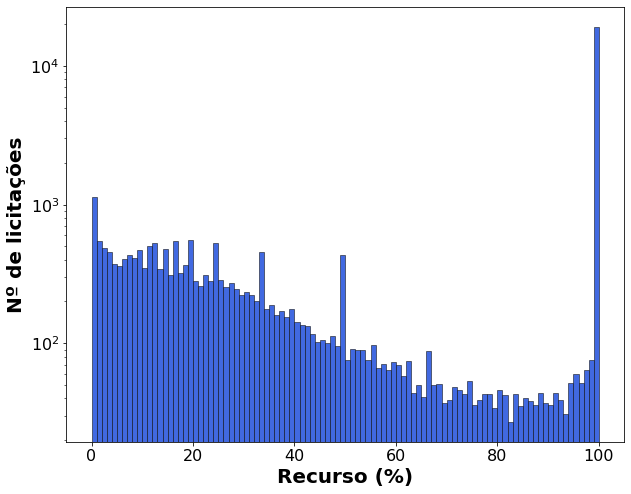

<Figure size 432x288 with 0 Axes>

In [11]:
plot_histogram(vlr_recurso, 100, 'Recurso (%)', 'Nº de licitações', 'doc_length.png', log=True)

In [12]:
count = 0

for vlr in vlr_recurso:
    if vlr > 30:
        count += 1

count

25453

In [13]:
len(vlr_recurso)

37785

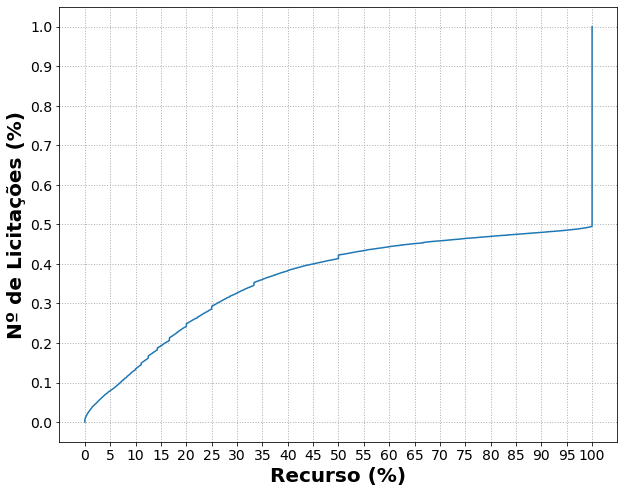

<Figure size 432x288 with 0 Axes>

In [16]:
from statsmodels.distributions.empirical_distribution import ECDF

# fit a cdf
ecdf = ECDF(vlr_recurso)

fig, (axis1) = plt.subplots(figsize=(10,8))
x_label = 'Recurso (%)'
y_label = 'Nº de Licitações (%)'


# kwargs = {'cumulative': True}
# sns.distplot(vlr_recurso, hist_kws=kwargs, kde_kws=kwargs)
plt.plot(ecdf.x, ecdf.y)

axis1.set_xticks([x for x in range(0, 101, 5)])
axis1.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

axis1.set_xlabel(x_label, fontsize=20, weight='bold')
axis1.set_ylabel(y_label, fontsize=20, weight='bold')

plt.grid(axis='both', linestyle=':', linewidth=1.0)
# axis1.legend(loc='upper right')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.show()
plt.clf()

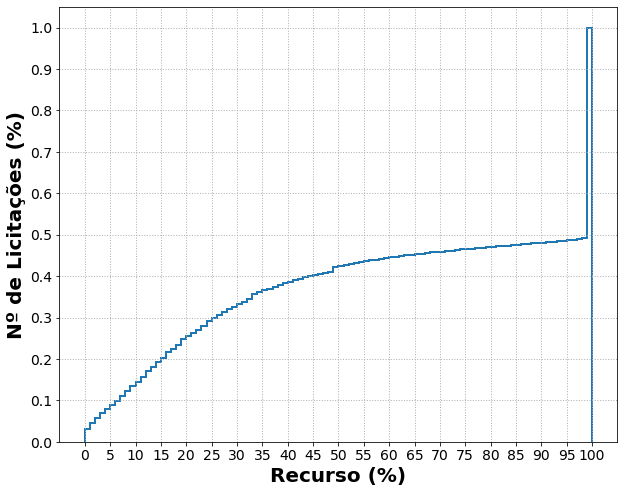

<Figure size 432x288 with 0 Axes>

In [19]:
fig, (axis1) = plt.subplots(figsize=(10,8))
x_label = 'Recurso (%)'
y_label = 'Nº de Licitações (%)'


n, bins, patches = axis1.hist(vlr_recurso, 100, density=True, histtype='step',
                           cumulative=True, label='Empirical', linewidth=2)

axis1.set_xticks([x for x in range(0, 101, 5)])
axis1.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

axis1.set_xlabel(x_label, fontsize=20, weight='bold')
axis1.set_ylabel(y_label, fontsize=20, weight='bold')

plt.grid(axis='both', linestyle=':', linewidth=1.0)
# axis1.legend(loc='upper right')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.show()
plt.clf()

In [ ]:
licitacoes_educacao = data.loc[data['nom_funcao'] == 'Educação']
vlr_recurso_ed = list(licitacoes_educacao['proporcao_vlr'])